In [620]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [621]:
train = pd.read_csv("bbcsports_train.csv")
test = pd.read_csv("bbcsports_val.csv")


In [622]:
x_train= train.iloc[:,:-1]
y_train= train.iloc[:,-1:]

In [623]:
x_test=test.iloc[:,:-1]
y_test= test.iloc[:,-1:]

In [624]:
y_train.describe()

,class_label
count,552.000000
mean,2.050725
std,1.215881
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [625]:
y_test.describe()

,class_label
count,185.000000
mean,1.962162
std,1.185820
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


The number of 0 occurances of each word for all documents.

In [626]:
(train==0).sum()

claxton        548
hunt           546
first          273
major          495
medal          523
              ... 
fiveset        552
mario          549
ancic          549
lundgren       549
class_label     77
Length: 4614, dtype: int64

Converting class numbers to the corresponding class names

In [627]:
class_names=[]
for i in train.class_label.values:
    if i==0:
        class_names.append("athletics")
    elif i==1:
        class_names.append("cricket")
    elif i==2:
        class_names.append("football")
    elif i==3:
        class_names.append("rugby")
    elif i==4:
        class_names.append("tennis")


In [628]:
class_names_val=[]
for i in test.class_label.values:
    if i==0:
        class_names_val.append("athletics")
    elif i==1:
        class_names_val.append("cricket")
    elif i==2:
        class_names_val.append("football")
    elif i==3:
        class_names_val.append("rugby")
    elif i==4:
        class_names_val.append("tennis")

Checking the skewness of the training set

In [629]:
train.class_label.skew(axis = 0)


-0.097310105999175

Text(0.5, 1.0, 'The Disribution of Classes')

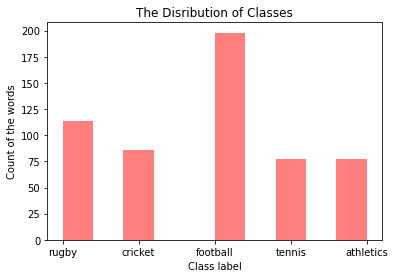

In [630]:
plt.hist([class_names], color=['r'], alpha=0.5)
plt.xlabel("Class label")
plt.ylabel("Count of the words")
plt.title("The Disribution of Classes")

Text(0.5, 1.0, 'The Disribution of Classes of Train and Validation Sets')

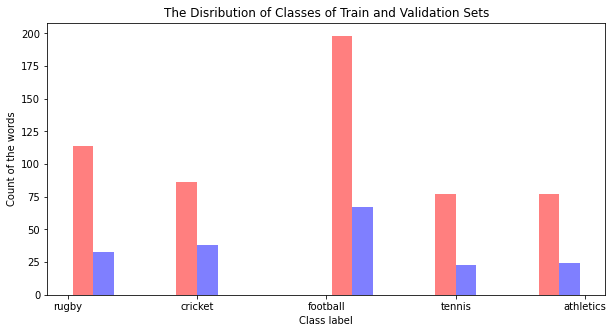

In [631]:
f, ax = plt.subplots(figsize=(10, 5))
plt.hist([class_names, class_names_val], color=['r','b'],alpha=0.5)
plt.xlabel("Class label")
plt.ylabel("Count of the words")
plt.title("The Disribution of Classes of Train and Validation Sets")

The skewness of validation set

In [632]:
test.class_label.skew(axis = 0)

0.053970839502950604

Sorting the mean of the number of words in descending order

In [633]:
x_train.mean().sort_values(ascending=False).head()

plai       1.260870
game       1.181159
win        1.023551
player     0.987319
england    0.961957
dtype: float64

Sorting the max occurances in the descending order

In [656]:
train.max().sort_values(ascending=False)

roddick       53
nadal         46
zealand       32
dallaglio     25
point         25
              ..
sadli          0
bu             0
glamorgan      0
wigan          0
centrehalf     0
Length: 4614, dtype: int64

The words that have never occured

In [657]:
train.sum()[train.sum()==0]

3000m         0
raw           0
sadli         0
glamorgan     0
bu            0
condemn       0
alec          0
24th          0
section       0
centrehalf    0
bullock       0
sfa           0
tag           0
wigan         0
bbc1          0
fiveset       0
dtype: int64

In [659]:
# #of documents of each class
N_cricket= np.shape(np.where(y_train==1))[1]
N_athletics= np.shape(np.where(y_train==0))[1]
N_football= np.shape(np.where(y_train==2))[1]
N_rugby= np.shape(np.where(y_train==3))[1]
N_tennis= np.shape(np.where(y_train==2))[1]

#Total #of documents
total_N= train.shape[0]

In [660]:
#Priors of each class
prob_cricket= N_cricket/total_N
prob_athletics= N_athletics/total_N
prob_football= N_football/total_N
prob_rugby= N_rugby/total_N
prob_tennis= N_tennis/total_N
priors = [prob_cricket,prob_athletics,prob_football,prob_rugby,prob_tennis]

In [661]:
# class data
data_cricket  = train[train.class_label==1].iloc[:,0:train.shape[1]-1]
data_athletics  = train[train.class_label==0].iloc[:,0:train.shape[1]-1]
data_football  = train[train.class_label==2].iloc[:,0:train.shape[1]-1]
data_rugby  = train[train.class_label==3].iloc[:,0:train.shape[1]-1]
data_tennis  = train[train.class_label==4].iloc[:, 0:train.shape[1]-1].values

In [662]:
#occurence of each word for corresponding classes
cricket_word  = data_cricket.sum(axis=0)  # Tj cricket
football_word = data_football.sum(axis=0) #Tj football
athletics_word = data_athletics.sum(axis=0) #Tj athletics
rugby_word = data_rugby.sum(axis=0) #Tj, rugby
tennis_word  = data_tennis.sum(axis=0) # Tj, tennis


In [663]:
#likelihoods P(Xj|Y=yk)
cricket_posterior = cricket_word/cricket_word.sum() # P(Xj|yk=cricket)
football_posterior = football_word/ football_word.sum()# P(Xj|yk=football)
athletics_posterior = athletics_word/athletics_word.sum()# P(Xj|yk=athletis)
rugby_posterior = rugby_word/rugby_word.sum()# P(Xj|yk=rugby)
tennis_posterior = tennis_word/tennis_word.sum()# P(Xj|yk=tennis)

In [664]:
posterior_Arr = [athletics_posterior,cricket_posterior,football_posterior,rugby_posterior,tennis_posterior]


# MLE Estimator

In [665]:
# MLE 
def MLE(posterior_prob):
    multip_arr=np.zeros((test.shape[0],5))
    for i in range(0,len(posterior_prob)):  
        kk=np.zeros((1,test.shape[0]))
        for j  in range(0,test.shape[0]):
            kk[0][j] = (x_test.loc[j].mul(np.log(posterior_prob[i]))).sum()
            if kk[0][j] ==-math.inf:
                kk[0][j]=np.nan_to_num(-np.inf)
            
            multip_arr[j][i] =+ np.log(priors[i])+kk[0][j]
           
    return multip_arr

In [666]:
df_multiplication=MLE(posterior_Arr)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [667]:
def classify(MLE_results):
    
    index_max =np.argmax(MLE_results,axis=1)
    confusion_f= pd.concat([y_test,pd.DataFrame(index_max)] ,axis=1)
    confusion_f.columns =["ground truth", "predictions"]
    return confusion_f

In [683]:
confusion = classify(df_multiplication)
confusion

,ground truth,predictions
0,4,0
1,2,0
2,1,0
3,2,0
4,4,0
...,...,...
180,2,0
181,0,0
182,4,0
183,2,0


In [669]:
def evaluate_classification(confusion_matrix):
     
     tp = (confusion_matrix["ground truth"]==confusion_matrix["predictions"]).sum()
     tn = (confusion_matrix["ground truth"]!=confusion_matrix["predictions"]).sum()
     accuracy = tp/(tp+tn)
     return accuracy, tn

In [670]:
precision, wrong_pred= evaluate_classification(confusion)

In [671]:
print('Validation accuracy is  %.2f' % (precision*100), '%. \n','Number of wrong predictions', wrong_pred,'.')

Validation accuracy is  24.32 %. 
 Number of wrong predictions 140 .


# MAP Estimator

In [672]:
alpha = 1

In [673]:
#Likelihoods P(Xj|Y=yk)
cricket_posterior_MAP = (cricket_word+alpha)/(cricket_word.sum()+alpha*x_test.shape[1]) # P(Xj|yk=cricket)
football_posterior_MAP = (football_word+alpha)/ (football_word.sum()+alpha*x_test.shape[1])# P(Xj|yk=football)
athletics_posterior_MAP = (athletics_word+alpha)/(athletics_word.sum()+alpha*x_test.shape[1])# P(Xj|yk=athletis)
rugby_posterior_MAP = (rugby_word+alpha)/(rugby_word.sum()+alpha*x_test.shape[1])# P(Xj|yk=rugby)
tennis_posterior_MAP = (tennis_word+alpha)/(tennis_word.sum()+alpha*x_test.shape[1])# P(Xj|yk=tennis)

In [674]:
posterior_Arr_MAP = [athletics_posterior_MAP,cricket_posterior_MAP,football_posterior_MAP,rugby_posterior_MAP,tennis_posterior_MAP]


In [675]:
MAP_mul = MLE(posterior_Arr_MAP)
confusion_MAP = classify(MAP_mul)
precision_MAP, wrong_pred_MAP = evaluate_classification(confusion_MAP)

In [676]:
print('Validation accuracy is  %.2f' % (precision_MAP*100), '%.\n','Number of wrong predictions', wrong_pred_MAP,'.')

Validation accuracy is  97.30 %.
 Number of wrong predictions 5 .


In [682]:
confusion_MAP

,ground truth,predictions
0,4,4
1,2,2
2,1,1
3,2,2
4,4,4
...,...,...
180,2,2
181,0,0
182,4,4
183,2,2
